## Training Logistic Regression

Logistic Regression é um algoritmo de aprendizado de máquina amplamente utilizado para problemas de classificação binária, embora também possa ser adaptado para multiclasse. Diferente da regressão linear, que prevê valores contínuos, a regressão logística estima a probabilidade de uma amostra pertencer a uma determinada classe, aplicando a função sigmoide para transformar a combinação linear dos atributos em uma saída entre 0 e 1. É um modelo simples, interpretável e eficiente, especialmente eficaz quando há uma relação linear entre os atributos e o logaritmo das chances (log-odds) do evento.

<table>
        <thead>
            <tr>
                <th rowspan="2">Modelo</th>
                <th rowspan="2">Acurácia</th>
                <th colspan="3">Precisão</th>
                <th colspan="3">Recall</th>
                <th colspan="3">F1-Score</th>
            </tr>
            <tr>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>LR - All</td>
                <td>95%</td>
                <td>0.99</td>
                <td>0.64</td>
                <td>0.87</td>
                <td>0.96</td>
                <td>0.90</td>
                <td>0.95</td>
                <td>0.98</td>
                <td>0.75</td>
                <td>0.91</td>
            </tr>
            <tr>
                <td>LR - Selected</td>
                <td>95%</td>
                <td>0.99</td>
                <td>0.64</td>
                <td>0.87</td>
                <td>0.96</td>
                <td>0.90</td>
                <td>0.95</td>
                <td>0.98</td>
                <td>0.75</td>
                <td>0.91</td>
            </tr>
</table>

### Setup

In [120]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

In [121]:
output_dir = '../images'
os.makedirs(output_dir, exist_ok=True)

In [122]:
def save_plot(fig, filename):
    file_path = os.path.join(output_dir, filename)
    fig.savefig(file_path, bbox_inches='tight')
    print(f'Imagem salva como {file_path}')

### Recovering the data

In [123]:
import pandas as pd

In [124]:
ML_ROOT_DIR = "../../ml-models"
FOLDER_ID = "dataset"
LDD_PATH = os.path.join(ML_ROOT_DIR, FOLDER_ID)

In [125]:
train_data = pd.read_csv(os.path.join(LDD_PATH, 'ldd_train_resampled.csv'))

In [126]:
train_data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,60,5.0,70,8.1,8.6,3.5,1.8,5.3,1.6,29.0,0
1,1,55,2.6,48,11.8,5.1,1.2,1.0,3.6,0.5,33.0,0
2,1,51,10.4,76,7.3,3.3,2.0,1.0,1.2,0.9,33.0,0
3,0,77,5.0,106,5.4,3.9,2.1,1.2,4.2,1.1,24.0,2
4,1,54,6.8,73,7.5,5.1,2.0,1.3,1.4,1.5,39.0,0


In [127]:
test_data = pd.read_csv(os.path.join(LDD_PATH, 'ldd_test.csv'))

In [128]:
test_data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,52,5.3,56,8.8,5.3,2.5,1.1,2.3,1.1,29.0,0
1,0,60,3.0,42,6.2,5.8,0.9,1.0,4.4,0.4,27.0,0
2,1,52,3.0,60,7.0,3.8,3.2,0.8,1.7,1.4,33.0,0
3,1,45,4.3,71,7.2,5.6,2.0,1.1,3.0,1.0,19.0,0
4,0,30,3.0,42,4.1,4.9,1.3,1.2,3.2,0.5,22.0,2


In [129]:
X_train = train_data.drop(columns=['CLASS'])
y_train = train_data['CLASS']

In [130]:
X_test = test_data.drop(columns=['CLASS'])
y_test = test_data['CLASS']

### Training with all features

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [132]:
model = LogisticRegression() 
model.fit(X_train, y_train)

c:\Users\luizf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
y_pred = model.predict(X_test)

In [134]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.7850


In [135]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       169
           1       0.24      0.80      0.37        10
           2       0.53      0.81      0.64        21

    accuracy                           0.79       200
   macro avg       0.58      0.80      0.63       200
weighted avg       0.89      0.79      0.82       200



In [136]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[132  23  14]
 [  1   8   1]
 [  2   2  17]]


In [137]:
param_grid = {
  'C': [0.01, 0.1, 1, 10],
  'penalty': ['l1', 'l2'],
  'solver': ['liblinear', 'saga'],
  'max_iter': [100, 200]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [138]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


In [139]:
best_params_model = grid_search.best_estimator_

In [140]:
y_pred_best = best_params_model.predict(X_test)
print(f"Acurácia do modelo otimizado: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Acurácia do modelo otimizado: 0.9550
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       169
           1       0.64      0.90      0.75        10
           2       0.87      0.95      0.91        21

    accuracy                           0.95       200
   macro avg       0.84      0.94      0.88       200
weighted avg       0.96      0.95      0.96       200



In [141]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_best))

Matriz de Confusão:
[[162   4   3]
 [  1   9   0]
 [  0   1  20]]


In [142]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_best)

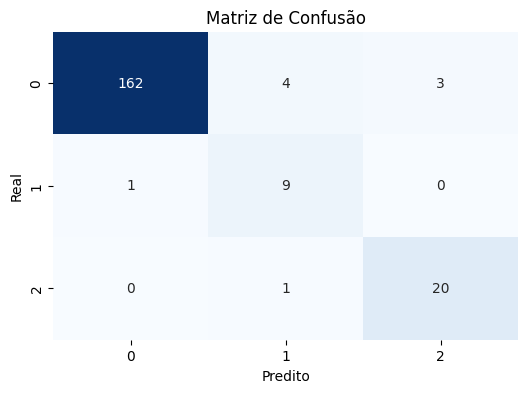

In [143]:
from matplotlib import pyplot as plt


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

#### Applying cross-validation

In [144]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

In [145]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'f1': make_scorer(f1_score, average='macro')
}

In [146]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [147]:
scores = cross_validate(best_params_model, X_train, y_train, cv=skf, scoring=scoring)

In [148]:
print('Acurácia:', scores['test_accuracy'])
print('Precisão:', scores['test_precision'])
print('Recall:', scores['test_recall'])
print('F1-Score:', scores['test_f1'])

Acurácia: [0.93596059 0.8817734  0.96551724 0.92610837 0.92610837 0.93069307
 0.94059406 0.94059406 0.93069307 0.92574257]
Precisão: [0.93767507 0.88563188 0.96602025 0.92663953 0.92802872 0.93068278
 0.94109769 0.94058229 0.93147337 0.92905075]
Recall: [0.93583553 0.88176763 0.96561311 0.92617793 0.92610477 0.93049459
 0.940518   0.940518   0.93049459 0.92595844]
F1-Score: [0.93620987 0.882723   0.96556851 0.92631014 0.92660632 0.93035401
 0.94049554 0.9405155  0.93044134 0.92608225]


In [149]:
print(f'\nMédia de Acurácia: {scores["test_accuracy"].mean():.4f} ± {scores["test_accuracy"].std():.4f}')
print(f'Média de Precisão: {scores["test_precision"].mean():.4f} ± {scores["test_precision"].std():.4f}')
print(f'Média de Recall: {scores["test_recall"].mean():.4f} ± {scores["test_recall"].std():.4f}')
print(f'Média de F1-Score: {scores["test_f1"].mean():.4f} ± {scores["test_f1"].std():.4f}')


Média de Acurácia: 0.9304 ± 0.0197
Média de Precisão: 0.9317 ± 0.0188
Média de Recall: 0.9303 ± 0.0197
Média de F1-Score: 0.9305 ± 0.0195


In [150]:
import joblib
joblib.dump(best_params_model, '../models/LR_model.joblib')

['../models/LR_model.joblib']

### Training with the best features

In [151]:
from sklearn.feature_selection import SelectKBest, f_classif

In [152]:
k_values = range(1, X_train.shape[1] + 1)
accuracy_scores = []
selected_features_dict = {}

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    model = LogisticRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

    selected_features_indices = np.where(selector.get_support())[0]

    if hasattr(X_train, 'columns'):
        selected_features_dict[k] = X_train.columns[selected_features_indices].tolist()
    else:
        selected_features_dict[k] = selected_features_indices.tolist()

c:\Users\luizf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\luizf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [153]:
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor número de características: {best_k}")

Melhor número de características: 3


In [154]:
selector_best = SelectKBest(score_func=f_classif, k=best_k)
X_train_selected = selector_best.fit_transform(X_train, y_train)
X_test_selected = selector_best.transform(X_test)

In [155]:
print("Características selecionadas para o melhor k:")
print(selected_features_dict[best_k])

Características selecionadas para o melhor k:
['AGE', 'HbA1c', 'BMI']


In [156]:
%matplotlib inline
import matplotlib.pyplot as plt

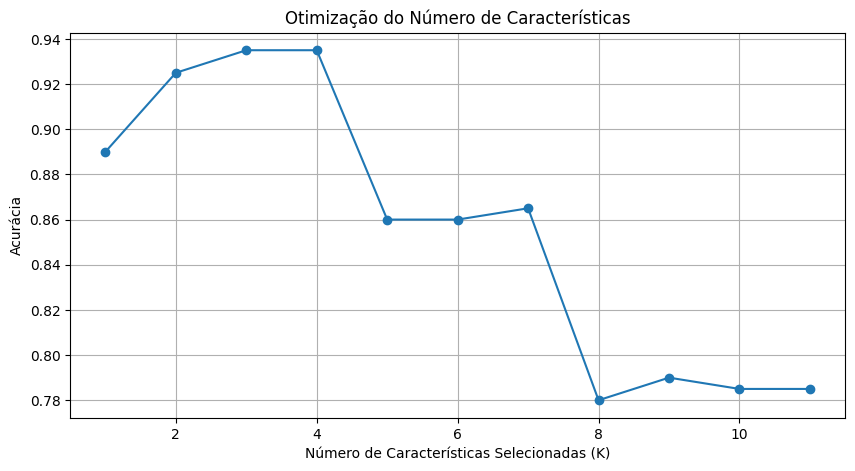

In [157]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Número de Características Selecionadas (K)')
plt.ylabel('Acurácia')
plt.title('Otimização do Número de Características')
plt.grid()
plt.show()

In [158]:
model_k = LogisticRegression(random_state=42)
model_k.fit(X_train_selected, y_train)

c:\Users\luizf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [159]:
y_pred = model_k.predict(X_test_selected)

In [160]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.9350


In [161]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       169
           1       0.59      1.00      0.74        10
           2       0.78      1.00      0.88        21

    accuracy                           0.94       200
   macro avg       0.79      0.97      0.86       200
weighted avg       0.96      0.94      0.94       200



In [162]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[156   7   6]
 [  0  10   0]
 [  0   0  21]]


In [163]:
param_grid = {
  'C': [0.01, 0.1, 1, 10],
  'penalty': ['l1', 'l2'],
  'solver': ['liblinear', 'saga'],
  'max_iter': [100, 200]
}

grid_search = GridSearchCV(estimator=model_k, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [164]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


In [165]:
best_model_k = grid_search.best_estimator_

In [166]:
y_pred_best = best_model_k.predict(X_test_selected)
print(f"Acurácia do modelo otimizado: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Acurácia do modelo otimizado: 0.9400
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       169
           1       0.62      1.00      0.77        10
           2       0.77      0.95      0.85        21

    accuracy                           0.94       200
   macro avg       0.80      0.96      0.86       200
weighted avg       0.96      0.94      0.94       200



In [167]:
cm = confusion_matrix(y_test, y_pred)

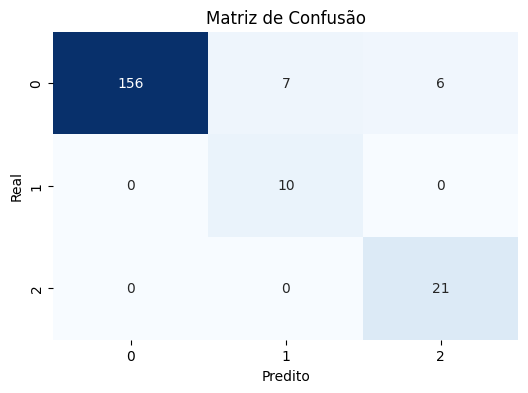

In [168]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [169]:
joblib.dump(best_model_k, '../models/LR_KBest_model.joblib')

['../models/LR_KBest_model.joblib']

#### Applying cross-validation

In [170]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'f1': make_scorer(f1_score, average='macro')
}

In [171]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [172]:
scores = cross_validate(best_model_k, X_train_selected, y_train, cv=skf, scoring=scoring)

In [173]:
print('Acurácia:', scores['test_accuracy'])
print('Precisão:', scores['test_precision'])
print('Recall:', scores['test_recall'])
print('F1-Score:', scores['test_f1'])

Acurácia: [0.9408867  0.95073892 0.94581281 0.93103448 0.94581281 0.95544554
 0.92079208 0.94059406 0.92079208 0.96039604]
Precisão: [0.94188362 0.95170965 0.9467366  0.93089961 0.94782015 0.95804162
 0.92051647 0.94089674 0.92074994 0.96136724]
Recall: [0.94095698 0.9507609  0.94585894 0.93129939 0.94571261 0.95529704
 0.92039801 0.94044483 0.9206175  0.9604185 ]
F1-Score: [0.94118928 0.95077796 0.94586466 0.93086016 0.94605484 0.955614
 0.91990596 0.94042398 0.92026909 0.96043892]


In [174]:
print(f'\nMédia de Acurácia: {scores["test_accuracy"].mean():.4f} ± {scores["test_accuracy"].std():.4f}')
print(f'Média de Precisão: {scores["test_precision"].mean():.4f} ± {scores["test_precision"].std():.4f}')
print(f'Média de Recall: {scores["test_recall"].mean():.4f} ± {scores["test_recall"].std():.4f}')
print(f'Média de F1-Score: {scores["test_f1"].mean():.4f} ± {scores["test_f1"].std():.4f}')


Média de Acurácia: 0.9412 ± 0.0128
Média de Precisão: 0.9421 ± 0.0135
Média de Recall: 0.9412 ± 0.0129
Média de F1-Score: 0.9411 ± 0.0131
